In [1]:
import pandas as pd
import numpy as np
import shared
import json


In [2]:
ve_or_ju = "ve"

In [3]:
runs_orig = pd.read_csv(f'data/runs_{ve_or_ju}.tsv', delimiter="\t")


In [4]:
country_counts = runs_orig["team_country"].value_counts()
top_country_counts = country_counts[country_counts > 100]
top_countries = top_country_counts.keys().tolist()
display(top_countries)

with open(f"data/top_countries_{ve_or_ju}.json", 'w') as outfile:
    json.dump(top_countries, outfile)

['FIN', 'SWE', 'NOR', 'RUS', 'LAT', 'EST', 'SUI', 'GBR']

In [5]:
runs_orig["first_name"] = runs_orig.name.str.split(" ", expand=True).iloc[:, 0]
runs_df = runs_orig
runs_df.head()

,name,year,team_id,team,team_country,pace,leg_nro,num_runs,first_name
0,anna mårsell,2018,3,STORA TUNA OK,SWE,6.441,1,4,anna
1,anna mårsell,2017,7,STORA TUNA OK,SWE,7.214,1,4,anna
2,anna mårsell,2016,22,STORA TUNA OK,SWE,6.291,1,4,anna
3,anna mårsell,2011,40,STORA TUNA OK,SWE,6.497,2,4,anna
4,magdalena olsson,2018,3,STORA TUNA OK,SWE,6.511,2,7,magdalena


In [6]:
fn_counts = runs_df["first_name"].value_counts()
top_fn_counts = fn_counts[fn_counts > 20]
top_first_names = top_fn_counts.keys().tolist()

with open(f"data/top_first_names_{ve_or_ju}.json", 'w') as outfile:
    json.dump(top_first_names, outfile)

In [7]:
# Temporarily remove 2018 in order to try predict it in other notebook
#runs_df = runs_df[runs_df.year != 2018]
#runs_df

In [8]:
features = shared.preprocess_features(runs_df, top_countries, ve_or_ju)
features.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39906 entries, 0 to 39905
Data columns (total 9 columns):
name            39906 non-null object
year            39906 non-null int64
team_id         39906 non-null int64
team            39906 non-null object
team_country    39906 non-null object
pace            39906 non-null float64
leg_nro         39906 non-null int64
num_runs        39906 non-null int64
first_name      39906 non-null object
dtypes: float64(1), int64(4), object(4)
memory usage: 2.7+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 3 columns):
first_name           974 non-null object
fn_pace_class        975 non-null int64
fn_pace_std_class    975 non-null int64
dtypes: int64(2), object(1)
memory usage: 23.0+ KB


None

[]

,team_id,team_id_log10,team_id_square,leg_1,leg_2,leg_3,leg_4,c_EST,c_FIN,c_GBR,...,fn_pace_class_6.0,fn_pace_class_7.0,fn_pace_class_8.0,fn_pace_class_9.0,fn_pace_class_nan,fn_pace_std_class_0.0,fn_pace_std_class_1.0,fn_pace_std_class_2.0,fn_pace_std_class_3.0,fn_pace_std_class_nan
0,3,0.477121,9,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,7,0.845098,49,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,22,1.342423,484,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,40,1.602060,1600,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,3,0.477121,9,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,7,0.845098,49,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,28,1.447158,784,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,32,1.505150,1024,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,27,1.431364,729,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,34,1.531479,1156,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [9]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39906 entries, 0 to 39905
Data columns (total 42 columns):
team_id                  -39906 non-null int64
team_id_log10            -39906 non-null float64
team_id_square           -39906 non-null int64
leg_1                    -39906 non-null Sparse[uint8, 0]
leg_2                    -39906 non-null Sparse[uint8, 0]
leg_3                    -39906 non-null Sparse[uint8, 0]
leg_4                    -39906 non-null Sparse[uint8, 0]
c_EST                    -39906 non-null Sparse[uint8, 0]
c_FIN                    -39906 non-null Sparse[uint8, 0]
c_GBR                    -39906 non-null Sparse[uint8, 0]
c_LAT                    -39906 non-null Sparse[uint8, 0]
c_NOR                    -39906 non-null Sparse[uint8, 0]
c_OTHER                  -39906 non-null Sparse[uint8, 0]
c_RUS                    -39906 non-null Sparse[uint8, 0]
c_SUI                    -39906 non-null Sparse[uint8, 0]
c_SWE                    -39906 non-null Sparse[uint

In [10]:
x = features.values
#x = features[["team_id", "team_id_log10", "team_id_log100", "team_id_log2", "team_id_square", "leg_id_1", "leg_id_2", "leg_id_3", "leg_id_4", "leg_id_5", "leg_id_6", "leg_id_7"]].values # Poista tää.
y = np.log(runs_df.pace.values)
y = y.reshape(len(y), 1)

display(x.shape)
display(y.shape)

(39906, 42)

(39906, 1)

In [11]:
import sklearn
from sklearn import linear_model
from sklearn import ensemble
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import joblib

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2019)
x_train.shape

(31924, 42)

In [13]:
import matplotlib.pyplot as plt
def fit_and_test_model(model, x_train, x_test, y_train, y_test, fit_params={}):
    model.fit(x_train, y_train.ravel(), **fit_params)
    y_pred = np.exp(model.predict(x_test))
    print(f"Shapes: y_test={np.exp(y_test).shape} y_pred={y_pred.shape}")
    print("Mean squared error: %.3f" % mean_squared_error(np.exp(y_test), y_pred))
    print('Explained variance score: %.3f' % r2_score(np.exp(y_test), y_pred))
    
    plt.scatter(x_test[:,0], np.exp(y_test),  color='red', alpha=0.01)
    plt.scatter(x_test[:,0], y_pred, color='blue', alpha=0.01)
    plt.ylim(4, 20)
    plt.show()

In [14]:
y_train.shape

(31924, 1)

Shapes: y_test=(7982, 1) y_pred=(7982,)
Mean squared error: 5.410
Explained variance score: 0.432


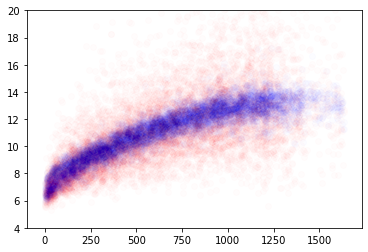

CPU times: user 810 ms, sys: 458 ms, total: 1.27 s
Wall time: 375 ms


In [15]:
%%time
linear = linear_model.LinearRegression()
fit_and_test_model(linear, x_train, x_test, y_train, y_test)

In [16]:
pd.DataFrame({'name':features.keys(), 'coef':linear.coef_})

,name,coef
0,team_id,6.277230e-04
1,team_id_log10,5.667897e-02
2,team_id_square,-2.421174e-07
3,leg_1,-4.537245e-02
4,leg_2,-3.169394e-03
5,leg_3,2.875676e-02
6,leg_4,1.978509e-02
7,c_EST,4.013678e-02
8,c_FIN,6.032813e-02
9,c_GBR,-1.480284e-02


      Iter       Train Loss   Remaining Time 
         1           0.0634            6.18m
         2           0.0584            6.25m
         3           0.0543            6.25m
         4           0.0509            6.24m
         5           0.0482            6.20m
         6           0.0460            6.16m
         7           0.0441            6.10m
         8           0.0426            6.09m
         9           0.0414            6.07m
        10           0.0403            6.09m
        20           0.0357            6.03m
        30           0.0343            5.33m
        40           0.0337            4.94m
        50           0.0333            4.66m
        60           0.0330            4.40m
        70           0.0329            4.27m
        80           0.0327            4.15m
        90           0.0326            4.04m
       100           0.0325            4.00m
       200           0.0319            3.81m
       300           0.0315            3.49m
       40

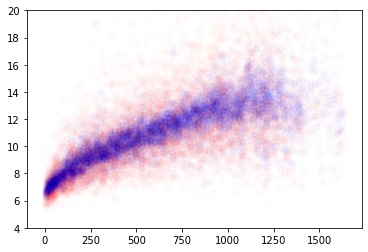

CPU times: user 3min 15s, sys: 353 ms, total: 3min 16s
Wall time: 3min 15s


In [17]:
%%time
gbr_num_estimators=7100
gbr = sklearn.ensemble.GradientBoostingRegressor(n_estimators=gbr_num_estimators, random_state=0, verbose=1)

fit_and_test_model(gbr, x_train, x_test, y_train, y_test)

#print(f"feature_importances_: {gbr.feature_importances_}")
#gbr_features = pd.DataFrame({'feature':first_names.columns, 'importance': gbr.feature_importances_})
#gbr_features['feature'] = gbr_features['feature'].str.replace('top_first_name_','')
#display(gbr_features.sort_values(by="importance", ascending=False))

In [18]:
gbr_num_estimators_quantile=int(gbr_num_estimators/2)

      Iter       Train Loss   Remaining Time 
         1           0.0590            2.62m
         2           0.0565            2.45m
         3           0.0543            2.40m
         4           0.0524            2.44m
         5           0.0508            2.44m
         6           0.0493            2.47m
         7           0.0480            2.45m
         8           0.0469            2.47m
         9           0.0460            2.48m
        10           0.0453            2.45m
        20           0.0417            2.42m
        30           0.0407            2.37m
        40           0.0404            2.29m
        50           0.0401            2.16m
        60           0.0400            2.07m
        70           0.0399            2.02m
        80           0.0398            1.96m
        90           0.0397            1.91m
       100           0.0397            1.87m
       200           0.0393            1.63m
       300           0.0392            1.46m
       40

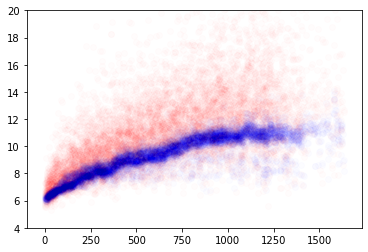

In [19]:
gbr_q_low = sklearn.ensemble.GradientBoostingRegressor(loss='quantile', alpha=0.159, n_estimators=gbr_num_estimators_quantile, random_state=0, verbose=1)
fit_and_test_model(gbr_q_low, x_train, x_test, y_train, y_test)


      Iter       Train Loss   Remaining Time 
         1           0.0631            2.79m
         2           0.0611            2.60m
         3           0.0594            2.51m
         4           0.0578            2.56m
         5           0.0565            2.65m
         6           0.0553            2.75m
         7           0.0543            2.84m
         8           0.0534            2.86m
         9           0.0526            2.84m
        10           0.0519            2.79m
        20           0.0482            2.50m
        30           0.0470            2.31m
        40           0.0464            2.24m
        50           0.0461            2.13m
        60           0.0459            2.04m
        70           0.0457            1.96m
        80           0.0456            1.91m
        90           0.0455            1.86m
       100           0.0454            1.83m
       200           0.0451            1.62m
       300           0.0451            1.49m
       40

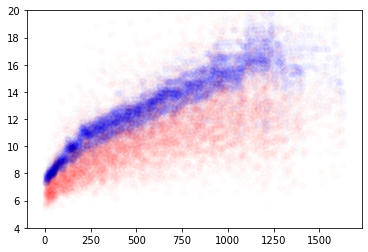

In [20]:
gbr_q_high = sklearn.ensemble.GradientBoostingRegressor(loss='quantile', alpha=0.841, n_estimators=gbr_num_estimators_quantile, random_state=0, verbose=1)
fit_and_test_model(gbr_q_high, x_train, x_test, y_train, y_test)



In [21]:
joblib.dump(gbr, f'gbr_{ve_or_ju}.sav')
joblib.dump(gbr_q_low, f'gbr_q_low_{ve_or_ju}.sav')
joblib.dump(gbr_q_high, f'gbr_q_high_{ve_or_ju}.sav')


['gbr_q_high_ve.sav']

In [22]:
gbr_preds = gbr.predict(pd.DataFrame(x_test))
gbr_q_low_preds = gbr_q_low.predict(pd.DataFrame(x_test))
gbr_q_high_preds = gbr_q_high.predict(pd.DataFrame(x_test))

In [23]:
gbr_q_pred_errors = pd.DataFrame({
    'q_low':np.exp(gbr_q_low_preds),
    'true':np.exp(y_test).ravel(), 
    'predicted':np.exp(gbr_preds), 
    'q_high':np.exp(gbr_q_high_preds), 
})

gbr_q_pred_errors["q_low_error"] = gbr_q_pred_errors.true < gbr_q_pred_errors.q_low
gbr_q_pred_errors["q_high_error"] = gbr_q_pred_errors.true > gbr_q_pred_errors.q_high
gbr_q_pred_errors["q_error"] = np.logical_or(gbr_q_pred_errors.q_low_error, gbr_q_pred_errors.q_high_error)

gbr_q_pred_errors["std"] = (gbr_q_pred_errors.q_high - gbr_q_pred_errors.q_low) / 2
# Intentionally don't use log scale for calculation to get bigger std
# TODO IS this causing big std in Bayesina models? :(
gbr_q_pred_errors["std_correct"] = np.exp((gbr_q_high_preds - gbr_q_low_preds) / 2)
gbr_q_pred_errors["abs_error"] = np.abs(gbr_q_pred_errors.predicted - gbr_q_pred_errors.true)
gbr_q_pred_errors["abs_error_in_stds"] = gbr_q_pred_errors.abs_error / np.exp(gbr_q_pred_errors["std_correct"])

display(gbr_q_pred_errors.tail(15).round(3))
display(gbr_q_pred_errors.q_low_error.mean())
display(gbr_q_pred_errors.q_high_error.mean())
display(gbr_q_pred_errors.q_error.mean())
display(gbr_q_pred_errors["std"].mean())
display(gbr_q_pred_errors["std_correct"].mean())
display(gbr_q_pred_errors["abs_error_in_stds"].mean())

,q_low,true,predicted,q_high,q_low_error,q_high_error,q_error,std,std_correct,abs_error,abs_error_in_stds
7967,7.914,7.500,9.022,10.343,True,False,True,1.214,1.143,1.522,0.485
7968,6.314,7.761,7.542,7.864,False,False,False,0.775,1.116,0.219,0.072
7969,10.743,14.444,13.763,16.106,False,False,False,2.681,1.224,0.681,0.200
7970,7.775,8.949,8.612,9.884,False,False,False,1.054,1.127,0.337,0.109
7971,6.848,6.789,8.033,8.428,True,False,True,0.790,1.109,1.244,0.410
7972,7.803,8.600,7.798,9.726,False,False,False,0.961,1.116,0.802,0.263
7973,11.160,12.657,13.640,15.620,False,False,False,2.230,1.183,0.983,0.301
7974,8.989,9.333,11.563,12.743,False,False,False,1.877,1.191,2.230,0.678
7975,10.981,9.621,13.099,15.477,True,False,True,2.248,1.187,3.478,1.061
7976,7.082,8.868,7.985,9.948,False,False,False,1.433,1.185,0.883,0.270


0.168754698070659

0.15998496617389127

0.32873966424455026

1.9349127126595198

1.185321730829611

0.49927801907066716

In [24]:
np.exp(1.138)

3.1205210778255728

In [25]:
%%date

UsageError: Cell magic `%%date` not found.


In [ ]:
STOP_HERE

In [ ]:
import os
#os.environ['MKL_THREADING_LAYER'] = 'GNU'
os.environ['THEANO_FLAGS'] = 'device=cpu'
#os.environ['THEANO_FLAGS'] = 'device=cuda,floatX=float32,force_device=True'

import pymc3 as pm
import pmlearn
from pmlearn.linear_model import LinearRegression
print('Running on pymc-learn v{}'.format(pmlearn.__version__))


In [ ]:
import multiprocessing
multiprocessing.cpu_count()

In [ ]:

pmlearn_linear = LinearRegression()
fit_params={
    "inference_type": "nuts",
    "inference_args": {
        "cores": multiprocessing.cpu_count() -1,
        #"chains":2,
        "init": 'adapt_diag',
        #"tune": 2000,
        "target_accept": 0.9999
    }
}
fit_and_test_model(pmlearn_linear, pd.DataFrame(data=x_train), pd.DataFrame(x_test), y_train, y_test,fit_params)

In [ ]:
pmlearn_preds = pmlearn_linear.predict(pd.DataFrame(x_test), return_std=True)

In [ ]:

joblib.dump(pmlearn_linear, 'pmlearn_linear.sav')

In [ ]:
pred_errors = pd.DataFrame({
    'mean':np.exp(pmlearn_preds[0]), 
    'std':np.exp(pmlearn_preds[1]), 
    'true':np.exp(y_test).ravel(), 
    'error':np.abs(np.exp(y_test).ravel() -np.exp(pmlearn_preds[0])) / np.exp(pmlearn_preds[1])
})
display(pred_errors.head(15))
pred_errors.error.mean()

In [ ]:
pmlearn_linear.plot_elbo()

In [ ]:
pm.traceplot(pmlearn_linear.trace)

In [ ]:
pm.forestplot(pmlearn_linear.trace, varnames=["betas", "alpha", "s"]);

In [ ]:
summary_df = pm.summary(pmlearn_linear.trace, varnames=["betas", "alpha", "s"])
summary_df

In [ ]:
pm.plot_posterior(pmlearn_linear.trace, varnames=["betas", "alpha", "s"],
                 figsize = [14, 8])

In [ ]:
pm.gelman_rubin(pmlearn_linear.trace, varnames=["betas", "alpha", "s"])